In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FastICA
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
from sklearn import mixture
from sklearn.random_projection import GaussianRandomProjection
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

random_seed=5000

In [6]:
data_wq = pd.read_csv('wineQualityReds.csv')
data_wq = data_wq.drop('Unnamed: 0', axis=1)
data_wq['quality'] = data_wq.quality.apply(lambda q: 0 if q <= 5 else 1)
y_wq = data_wq['quality']
x_wq = data_wq.drop('quality', axis=1)
x_wq = StandardScaler().fit_transform(x_wq)

data_breast = pd.read_csv('data.csv')
data_breast = data_breast.drop(['id', 'Unnamed: 32'], axis=1)
y_breast = data_breast['diagnosis']
y_breast = y_breast.apply(lambda q: 0 if q == 'B' else 1)
x_breast = data_breast.drop(['diagnosis'], axis=1)
x_breast = StandardScaler().fit_transform(x_breast)

# KMeans

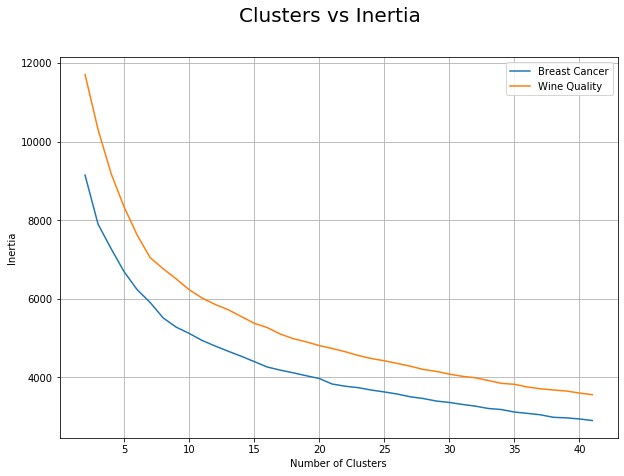

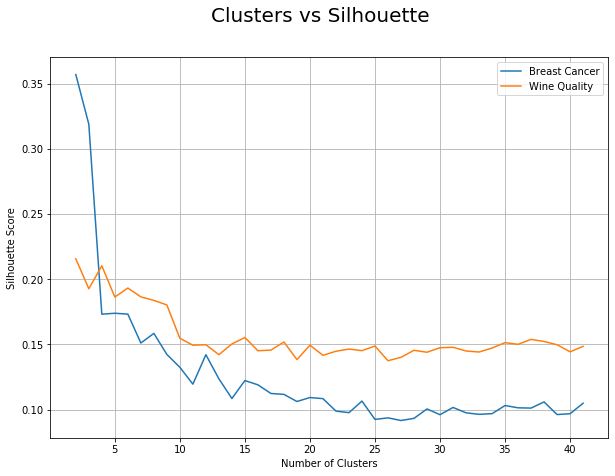

In [9]:
X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(x_wq, y_wq, test_size=0.2, random_state=0)

clusters = 2 + np.arange(40)

scores = []
init_inertia_wq = []
init_silhouette_wq = []
i=0

for cluster in clusters:
    classifier = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_seed)
    classifier = classifier.fit(X_real_train, y_real_train)
    init_inertia_wq.append(classifier.inertia_)
    init_silhouette_wq.append(silhouette_score(X_real_train, classifier.labels_))
    
    y_pred = classifier.predict(X_real_test)
    accuracy = metrics.accuracy_score(y_pred, y_real_test)
    scores.append(accuracy)
    i += 1

    
X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(x_breast, y_breast, 
                                                                        test_size=0.2, random_state=0)

scores = []
init_inertia_breast = []
init_silhouette_breast = []
i = 0

for cluster in clusters:
    classifier = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_seed)
    classifier = classifier.fit(X_real_train, y_real_train)
    init_inertia_breast.append(classifier.inertia_)
    init_silhouette_breast.append(silhouette_score(X_real_train, classifier.labels_))
    
    y_pred = classifier.predict(X_real_test)
    accuracy = metrics.accuracy_score(y_pred, y_real_test)
    scores.append(accuracy)
    i += 1
    
plt.figure(figsize=(10, 7))
plt.suptitle("Clusters vs Inertia", fontsize=20)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.plot(clusters, init_inertia_breast, label='Breast Cancer')
plt.plot(clusters, init_inertia_wq, label='Wine Quality')
plt.grid()
plt.legend()
plt.savefig('ClusteringInertia.png')
plt.show()

plt.figure(figsize=(10, 7))
plt.suptitle("Clusters vs Silhouette", fontsize=20)
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.plot(clusters, init_silhouette_breast, label='Breast Cancer')
plt.plot(clusters, init_silhouette_wq, label='Wine Quality')
plt.grid()
plt.legend()
plt.savefig('ClusteringSilhouette.png')
plt.show()

# EM

### Silhouette Score

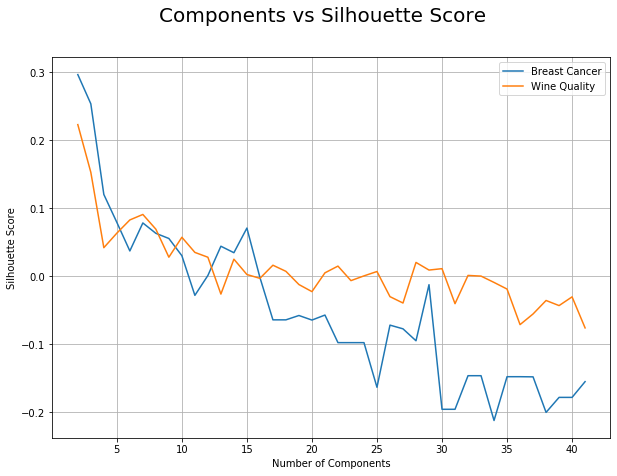

In [16]:
X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(x_breast, y_breast, test_size=0.2, random_state=0)

clusters = 2 + np.arange(40)
scores_breast = []
i=0

for cluster in clusters:
    classifier = GaussianMixture(n_components=cluster, max_iter=1000, random_state=random_seed)
    classifier = classifier.fit(X_real_train, y_real_train)
    curr_y = classifier.predict(X_real_test)
    
    scores_breast.append(silhouette_score(X_real_test, curr_y))
    
    i += 1


X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(x_wq, y_wq, test_size=0.2, random_state=0)

scores_wq = []
i=0

for cluster in clusters:
    classifier = GaussianMixture(n_components=cluster, max_iter=1000, random_state=random_seed)
    classifier = classifier.fit(X_real_train, y_real_train)
    curr_y = classifier.predict(X_real_test)
    
    scores_wq.append(silhouette_score(X_real_test, curr_y))
    
    i += 1


plt.figure(figsize=(10, 7))
plt.suptitle("Components vs Silhouette Score", fontsize=20)
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Components")
plt.plot(clusters, scores_breast, label='Breast Cancer')
plt.plot(clusters, scores_wq, label='Wine Quality')
plt.grid()
plt.legend()
plt.savefig('EMSilhouette.png')
plt.show()

### BIC Score

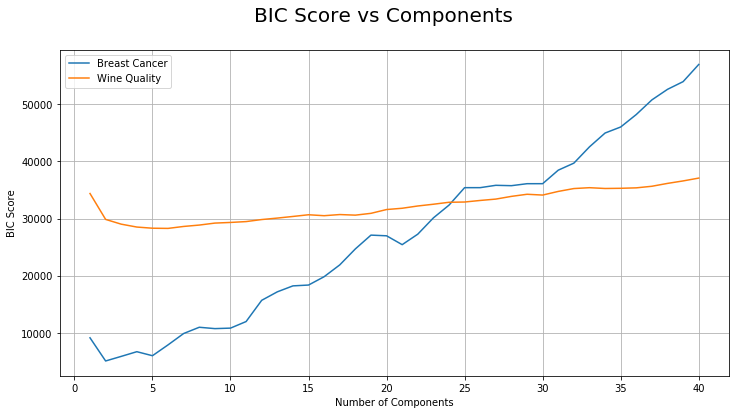

In [14]:
X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(x_breast, y_breast, test_size=0.2, random_state=0)


init_bic_breast = []
components = 1 + np.arange(40)

for component in components:
    gmm = GaussianMixture(n_components=component, max_iter=1000, random_state=random_seed)
    gmm.fit(X_real_train, y_real_train)
    init_bic_breast.append(gmm.bic(X_real_train))
        
init_bic_breast = np.array(init_bic_breast)




X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(x_wq, y_wq, test_size=0.2, random_state=0)
init_bic_wq = []

for component in components:
    gmm = GaussianMixture(n_components=component, max_iter=1000, random_state=random_seed)
    gmm.fit(X_real_train, y_real_train)
    init_bic_wq.append(gmm.bic(X_real_train))
        
init_bic_wq = np.array(init_bic_wq)


plt.figure(figsize=(12, 6))
plt.suptitle('BIC Score vs Components', fontsize=20)
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.plot(components, init_bic_breast, label='Breast Cancer')
plt.plot(components, init_bic_wq, label='Wine Quality')
plt.grid()
plt.legend()
plt.savefig('EMBIC.png')
plt.show()

# PCA Variance

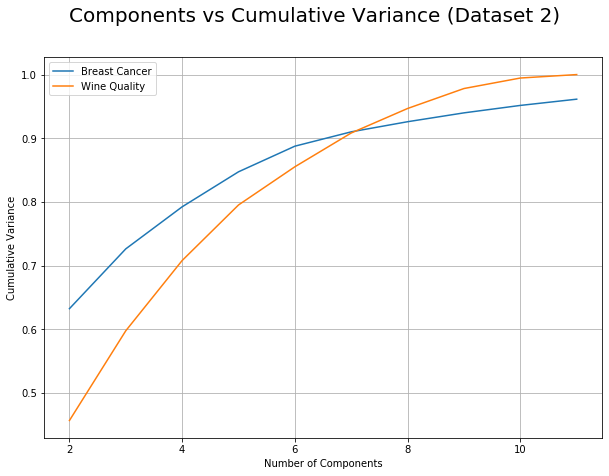

In [20]:
X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(x_breast, y_breast, test_size=0.2, random_state=0)

components = 2 + np.arange(10)
var_breast = []

kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

for component in components:
    pca = PCA(n_components = component, random_state=random_seed)
    principalComponents = pca.fit_transform(x_breast)
    var_breast.append(sum(pca.explained_variance_ratio_))
    

X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(x_wq, y_wq, test_size=0.2, random_state=0)

var_wq = []

kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

for component in components:
    pca = PCA(n_components = component, random_state=random_seed)
    principalComponents = pca.fit_transform(x_wq)
    var_wq.append(sum(pca.explained_variance_ratio_))
    

        
plt.figure(figsize=(10,7))
plt.suptitle('Components vs Cumulative Variance (Dataset 2)', fontsize=20)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.plot(components, var_breast, label='Breast Cancer')
plt.plot(components, var_wq, label='Wine Quality')
plt.grid()
plt.legend()
plt.savefig('Cumvar.png')
plt.show()